# Sistemas de Equações Diferenciais Ordinárias - Parte 2

<br>

Nessa aula, seguiremos estudando sistemas de EDOs. Nosso objetivo é entender e interpretar as soluções do sistema em termos dos autovalores e autovetores da sua matriz de coeficientes.

<br>

***
<br>

## Exemplo 1:

Consideremos o sistema

$$
\frac{d\textbf{x}}{dt} = \begin{pmatrix}-1 & 0 \\ 0 & -4\end{pmatrix}\textbf{x},
$$

cuja variável é a função vetorial $\textbf{x}(t)={x_1(t) \choose x_2(t)}$.

Utilize os códigos da aula passada para plotar o retrato de fase e o fluxo de vetores associado ao problema. A partir disso, responda:

a) Qual o comportamento assintótico das soluções? Todas as soluções tenderão a 0 para t = infinito

b) Existe(m) alguma(s) reta(s) que parece desempenhar um papel diferenciado ao longo das trajetórias? Existe uma reta onde u1 varia e u2 é sempre 0.

<br>

(10, 15)
(10, 15)


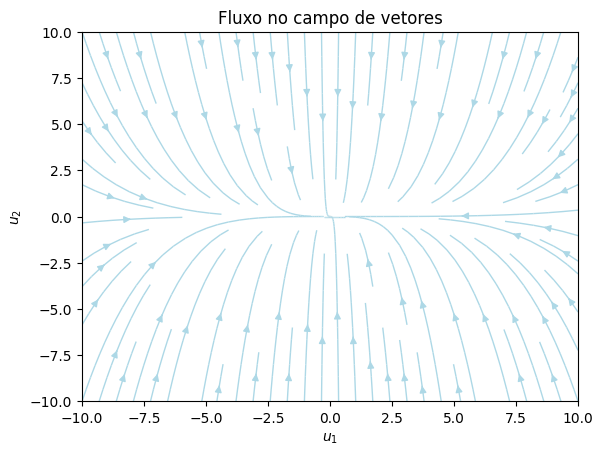

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# código para o fluxo de vetores

x_inic, x_final = -10, 10    # indica o primeiro e último ponto do eixo x
y_inic, y_final = -10, 10    # indica o primeiro e último ponto do eixo y

nx = 15    # gera 15 pontos no eixo x
ny = 10    # gera 10 pontos do eixo y

# Gera um array de pontos que inicia x_inic para x e y_inic para y. Terminando em x_final e y_final com nx e ny pontos
x_ponto = np.linspace(x_inic, x_final, nx)
y_ponto = np.linspace(y_inic, y_final, ny)

# gera uma malha com pontos na coordenada x_ponto e y_ponto
x_malha, y_malha = np.meshgrid(x_ponto, y_ponto)

# Cria uma função f com entradas u1 e u2 que retorna o valor de u1' e u2'
def f(u1, u2):
    return [-u1,-4*u2]

# Cria um vetor de zeros para x e y com tamanho de x_malha e y_malha
x_vetor = np.zeros(x_malha.shape)
y_vetor = np.zeros(y_malha.shape)
print(x_vetor.shape)
print(y_vetor.shape)
for i in range(ny):
    for j in range(nx):
        x = x_malha[i, j]
        y = y_malha[i, j]
        vet = f(x, y)
        x_vetor[i, j] = vet[0]    # laço for que cria uma matriz de x e y com os valores da matriz x_malha e y_malha e calcula o valor da edo em x e y, criando um vetor com os resultados.
        y_vetor[i, j] = vet[1]

plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue', density=1, linewidth=1)
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Fluxo no campo de vetores')
plt.show()

### Conclusão:

Vemos que todas as soluções $x(t)={x_1(t) \choose x_2(t)}$ do problema tem o mesmo comportamento assintótico: Onde tende a 0 para t no infinito, porém u2 tende a 0 mais rapidamente que u1
<br>

***
<br>

## Como identificar essas características no problema original?

A solução desse problema de valor inicial é uma função vetorial $\textbf{x}(t) = {x_1(t) \choose x_2(t)}$.

Nesse caso, como a matriz de coeficientes é <u>diagonal</u>, isso nos leva a duas EDOs independentes:

\begin{align}
\frac{d\textbf{x}}{dt} &= \begin{pmatrix}-1 & 0 \\ 0 & -4\end{pmatrix}\textbf{x} \\\\
{x_1'(t) \choose x_2'(t)} &= \begin{pmatrix}-1 & 0 \\ 0 & -4\end{pmatrix}{x_1(t) \choose x_2(t)}\\\\
{x_1'(t) \choose x_2'(t)} &= {-x_1(t) \choose -4x_2(t)}\\\\
\implies
x_1'(t) &= -x_1(t),\quad\quad x_2'(t) = -4x_2(t).
\end{align}

Como a primeira equação é apenas em $x_1$ e a segunda apenas em $x_2$, podemos resolver as EDOs separadamente:

$$
x_1(t) = C_1e^{-t},\quad\quad x_2(t) = C_2e^{-4t}.
$$

Assim, a solução geral do sistema é

\begin{align}
\textbf{x}(t) =& {x_1(t) \choose x_2(t)} \\\\
=& {C_1e^{-t}\choose C_2e^{-4t}} \\\\
=& {C_1e^{-t}\choose 0} + {0\choose C_2e^{-4t}} \\\\
=& C_1e^{-t}{1\choose 0} + C_2e^{-4t}{0\choose 1}.
\end{align}

Note que as constantes $C_1, C_2$ podem ser determinadas caso um valor inicial

$$\textbf{x}(t_0)={x_1(t_0)\choose x_2(t_0)}$$

seja fornecido.

<br><br>

Escrita dessa forma, a solução explicita as conclusões observadas acima:

1. Podemos verificar

$$
\lim_{t\to\infty}\textbf{x}(t) = \lim_{t\to\infty}\left[C_1e^{-t}{1\choose 0} + C_2e^{-4t}{0\choose 1}\right] = 0{1\choose 0} + 0{0\choose 1} = {0\choose 0}.
$$

2. Os vetores que aparecem, ${1\choose 0}$ e ${0\choose 1}$, fornecem os <u>eixos tangentes</u> aos quais as trajetórias se movimentam;
3. Os valores -1 e -4, que surgem nas exponenciais, são exatamente os valores na diagonal da matriz de coeficientes do problema, $$\begin{pmatrix}-1 & 0 \\ 0 & -4\end{pmatrix}.$$ Como -4, associado ao vetor ${0 \choose 1}$, é **maior em módulo** que -1, as trajetórias tendem a 0 mais rapidamente nessa direção do que na direção ${1 \choose 0}$.

<br>

***
<br>

# Autovalores e Autovetores
<br>

Note que as soluções são da forma

$$
Ce^{\lambda t},
$$

onde $\lambda$ é um elemento da diagonal da matriz de coeficientes do problema, $$\begin{pmatrix}-1 & 0 \\ 0 & -4\end{pmatrix}.$$

Isso não é por acaso; de fato, podemos mostrar que isso ocorre sempre que a matriz de coeficientes for diagonal.

Nos casos em que a matriz NÃO é diagonal, podemos tentar <u>diagonalizá-la</u>.

<br><br>
***

**<u>Definição:</u>** Uma matriz $A={a_{11}\quad a_{12} \choose a_{21}\quad a_{22}}$ é diagonalizável se podemos escrevê-la como um produto do tipo

$$
A = {u_1\quad v_1 \choose u_2\quad v_2}{\lambda_1\quad 0 \choose 0\quad \lambda_2}{u_1\quad v_1 \choose u_2\quad v_2}^{-1},
$$

onde $\lambda_1, \lambda_2$ são chamados os **autovalores** de $A$, associados aos **autovetores** $u={u_1\choose u_2}, v={v_1\choose v_2}$, respectivamente.

Autovetores e autovalores correspondentes satisfazem a relação

$$
Au = \lambda_1 u, \quad\quad Av = \lambda_2 v.
$$

<br>

***

Note que no exemplo anterior, tínhamos $\lambda_1=-1$ associado a ${1\choose 0}$ e $\lambda_2=-4$ associado a ${0\choose 1}$. Na prática, autovalores podem ser tanto reais como complexos, como veremos nos exemplos a seguir.

<br>

O cálculo analítico de autovetores e autovalores é estudado na disciplina de Álgebra Linear.

Vejamos como calculá-los computacionalmente, utilizando a biblioteca SymPy. Note que o resultado é impresso na forma "(autovalor, multiplicidade algébrica, autovetor)".

In [2]:
import sympy as sp
sp.init_printing()

# definindo a matriz
A = sp.Matrix([[-1, 0],
               [0, 4]])

A.eigenvects()

⎡⎛       ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡0⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢ ⎥⎥⎟, ⎜4, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣0⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

<br>

Argumentando através de autovalores e autovetores, é possível mostrar o seguinte resultado geral sobre sistemas homogêneos de EDOS lineares:

<br>

***

### <u>Teorema:</u>

Considere o sistema

$$
\textbf{x}'(t) = A\textbf{x}(t).
$$

Sejam $\lambda_1, \lambda_2$ os autovalores da matriz $A$ e $u={u_1\choose u_2}, v={v_1\choose v_2}$ os seus respectivos autovetores. Então, se

$$
\det{u_1\quad v_1 \choose u_2\quad v_2} \neq 0
$$

dizemos que

$$
x_1(t) = e^{\lambda_1t}{u_1\choose u_2}, \quad\quad x_2(t) = e^{\lambda_2t}{v_1\choose v_2}
$$

formam um conjunto fundamental de soluções para o sistema, e a solução geral é da forma

$$
\textbf{x}(t) = C_1e^{\lambda_1t}{u_1\choose u_2} + C_2e^{\lambda_2t}{v_1\choose v_2}.
$$

<br>

***


## Exemplo 2 - Estufa e leito de rochas revisitado

<br>

Considere o sistema de EDOs

$$
\textbf{x}' = \begin{pmatrix}-\frac{13}{8} & \frac34 \\ \frac14 & -\frac14\end{pmatrix}\textbf{x}.
$$

Descreva as soluções gerais do sistema a partir dos autovalores e autovetores da matriz de coeficientes e identifique esses elementos no campo de vetores associado ao problema.

(Note que esse é o mesmo problema da estufa e leito de rochas da aula passada, apenas transladado para que o equilíbrio térmico ocorra na origem $(0,0)$.)



In [3]:
import sympy as sp
sp.init_printing()

# definindo a matriz
A = sp.Matrix([[-13/8, 3/4], [1/4, -1/4]])

A.eigenvects()

⎡⎛          ⎡⎡0.986393923832144 ⎤⎤⎞  ⎛           ⎡⎡0.46790481002294⎤⎤⎞⎤
⎢⎜-1.75, 1, ⎢⎢                  ⎥⎥⎟, ⎜-0.125, 1, ⎢⎢                ⎥⎥⎟⎥
⎣⎝          ⎣⎣-0.164398987305357⎦⎦⎠  ⎝           ⎣⎣0.93580962004588⎦⎦⎠⎦

Assim, vemos que $\lambda_1=-1.75$ é um autovalor associado ao autovetor $u = {-6 \choose 1}$ e $\lambda_2=-0.125$ é autovalor associado a $v = {0.5 \choose 1}$.

Verifiquemos que elas formam um conjunto fundamental de soluções.

In [4]:
# formando a matriz de autovetores
mat = np.array([[-6, 0.5], [1, 1]])

np.linalg.det(mat)

-6.499999999999999

Como o determinante é diferente de 0, concluímos que a solução geral do sistema é dada por

$$
\textbf{x}(t) = C_1e^{-1.75t}{-6 \choose 1} + C_2e^{-0.125t}{0.5 \choose 1}.
$$

Logo, como ambos os autovalores são negativos, as soluções satisfazem

$$
\lim_{t\to\infty}\textbf{x}(t) = \lim_{t\to\infty}\left[C_1e^{-1.75t}{-6 \choose 1} + C_2e^{-0.125t}{0.5 \choose 1}\right] = {0 \choose 0}.
$$

Porém, como $\lambda_1$ é maior em módulo que $\lambda_2$, segue que o primeiro termo se anula mais rapidamente. Logo, $\textbf{x}(t)$ se aproximará da origem paralelamente à reta gerada por $v={0.5 \choose 1}$ (que é a reta $y=2x$).

De maneira análoga, quando $t\to-\infty$, as soluções $\textbf{x}(t)$ tendem a infinito, mas de maneira paralela à reta gerada por $u = {-6 \choose 1}$ (que é a reta de equação $y=-\frac{x}{6}$).

Vamos conferir essas informações plotando cada uma dessas retas e comparando com o campo de vetores.

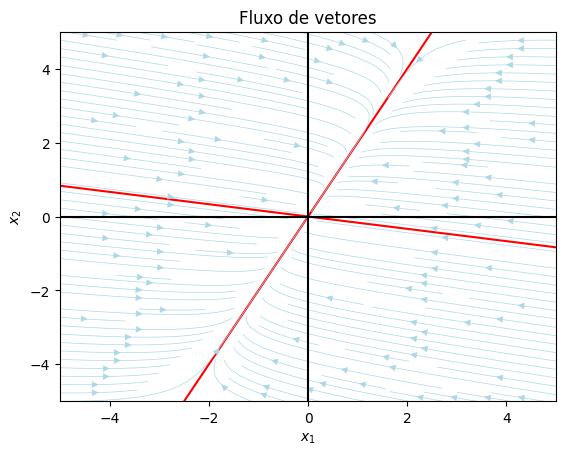

In [5]:
x_inic, x_final = -5, 5    # intervalo estudado no eixo x
y_inic, y_final = -5, 5    # intervalo estudado no eixo y

nx = 30    # número de pontos que queremos entre x_inic e x_final
ny = 30    # número de pontos que queremos entre y_inic e y_final

# coordenadas dos pontos a serem plotados
x_ponto = np.linspace(x_inic, x_final, nx)
y_ponto = np.linspace(y_inic, y_final, ny)

# definindo uma malha de pontos com essas coordenadas
x_malha, y_malha = np.meshgrid(x_ponto, y_ponto)

# a equação diferencial é da forma (u1, u2)' = f(u1, u2)
def f(x1, x2):
    return [(-13/8)*x1 + (3/4)*x2, x1/4 - x2/4]

x_vetor = np.zeros(x_malha.shape)   # coordenadas x de cada vetor inicializadas em 0
y_vetor = np.zeros(y_malha.shape)   # coordenadas y de cada vetor inicializadas em 0

for i in range(ny):
    for j in range(nx):
        x = x_malha[i, j]
        y = y_malha[i, j]
        vet = f(x, y)
        x_vetor[i, j] = vet[0]    # preenchendo as coordenadas dos vetores
        y_vetor[i, j] = vet[1]

# plotando as retas geradas pelos autovetores
xi = np.linspace(x_inic, x_final, 200)
plt.plot(xi, 2*xi, 'r-')
plt.plot(xi, -xi/6, 'r-')
# controlando o tamanho do gráfico plotado
plt.rcParams['figure.figsize'] = [12, 8]
# fluxo de vetores
plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue', density=1.5, linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.axhline(color='k')
plt.axvline(color='k')
plt.title('Fluxo de vetores')
plt.show()

Nesse caso, em que ambos os autovalores são negativos, dizemos que a origem é um **nó atrator** do sistema.

<br>

***
<br>

## Exercício 1:
<br>

Faça a mesma análise vista no exemplo anterior para o sistema

$$
\textbf{x}' = \begin{pmatrix}1 & 1 \\ 4 & 1\end{pmatrix}\textbf{x}.
$$

Nesse caso, confirme que temos um autovalor positivo e outro negativo, de modo que dizemos que a origem é um **ponto de sela**. Verifique o comportamento das soluções quanto $t\to\infty$ e quando $t\to-\infty$.

In [6]:
# resolva aqui

sp.init_printing()

# definindo a matriz
A = sp.Matrix([[1, 1],
               [4, 1]])

A.eigenvects()

⎡⎛       ⎡⎡-1/2⎤⎤⎞  ⎛      ⎡⎡1/2⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢    ⎥⎥⎟, ⎜3, 1, ⎢⎢   ⎥⎥⎟⎥
⎣⎝       ⎣⎣ 1  ⎦⎦⎠  ⎝      ⎣⎣ 1 ⎦⎦⎠⎦

In [7]:
# formando a matriz de autovetores
mat = np.array([[-1/2, 1/2], [1, 1]])

np.linalg.det(mat)

-1.0

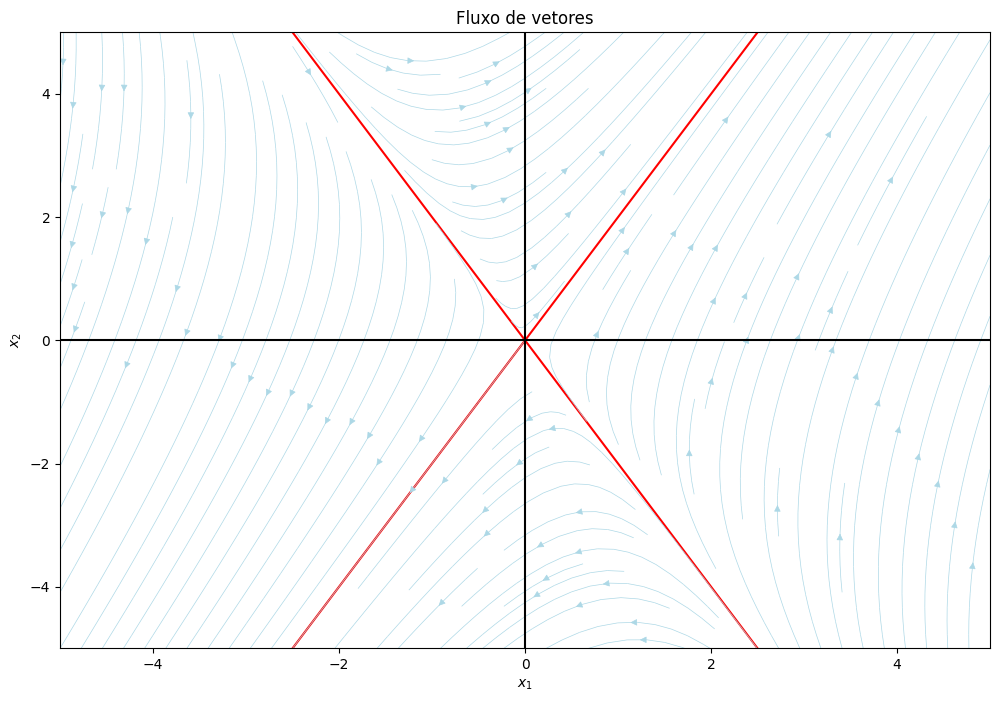

In [8]:
x_inic, x_final = -5, 5    # intervalo estudado no eixo x
y_inic, y_final = -5, 5    # intervalo estudado no eixo y

nx = 30    # número de pontos que queremos entre x_inic e x_final
ny = 30    # número de pontos que queremos entre y_inic e y_final

# coordenadas dos pontos a serem plotados
x_ponto = np.linspace(x_inic, x_final, nx)
y_ponto = np.linspace(y_inic, y_final, ny)

# definindo uma malha de pontos com essas coordenadas
x_malha, y_malha = np.meshgrid(x_ponto, y_ponto)

# a equação diferencial é da forma (u1, u2)' = f(u1, u2)
def f(x1, x2):
    return [(1)*x1 + (1)*x2, 4*x1 + 1*x2]

x_vetor = np.zeros(x_malha.shape)   # coordenadas x de cada vetor inicializadas em 0
y_vetor = np.zeros(y_malha.shape)   # coordenadas y de cada vetor inicializadas em 0

for i in range(ny):
    for j in range(nx):
        x = x_malha[i, j]
        y = y_malha[i, j]
        vet = f(x, y)
        x_vetor[i, j] = vet[0]    # preenchendo as coordenadas dos vetores
        y_vetor[i, j] = vet[1]

# plotando as retas geradas pelos autovetores
xi = np.linspace(x_inic, x_final, 200)
plt.plot(xi, -2*xi, 'r-')
plt.plot(xi, xi*2, 'r-')
# controlando o tamanho do gráfico plotado
plt.rcParams['figure.figsize'] = [12, 8]
# fluxo de vetores
plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue', density=1.5, linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.axhline(color='k')
plt.axvline(color='k')
plt.title('Fluxo de vetores')
plt.show()

<br>

***
<br>

## Exercício 2:
<br>

Idem para o sistema

$$
\textbf{x}' = \begin{pmatrix}-1 & 4 \\ \frac12 & -2\end{pmatrix}\textbf{x}.
$$

Baseado nos autovalores e autovetores, qual o comportamento assintótico das soluções?


In [9]:
# resolva aqui

sp.init_printing()

# definindo a matriz
A = sp.Matrix([[-1, 4],
               [1/2, -2]])

A.eigenvects()

⎡⎛      ⎡⎡0.970142500145332⎤⎤⎞  ⎛         ⎡⎡-1.1780301787479 ⎤⎤⎞⎤
⎢⎜0, 1, ⎢⎢                 ⎥⎥⎟, ⎜-3.0, 1, ⎢⎢                 ⎥⎥⎟⎥
⎣⎝      ⎣⎣0.242535625036333⎦⎦⎠  ⎝         ⎣⎣0.589015089373952⎦⎦⎠⎦

In [10]:
# formando a matriz de autovetores
mat = np.array([[0.97, -1.178], [0.2425, 0.589]])

np.linalg.det(mat)

0.856995

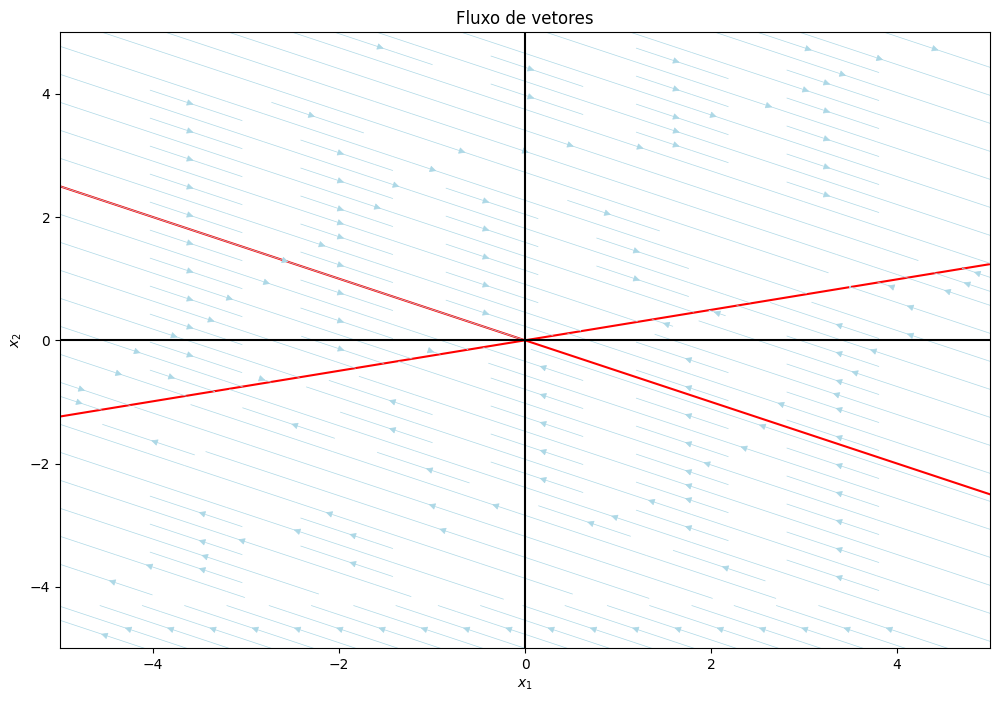

In [11]:
x_inic, x_final = -5, 5    # intervalo estudado no eixo x
y_inic, y_final = -5, 5    # intervalo estudado no eixo y

nx = 30    # número de pontos que queremos entre x_inic e x_final
ny = 30    # número de pontos que queremos entre y_inic e y_final

# coordenadas dos pontos a serem plotados
x_ponto = np.linspace(x_inic, x_final, nx)
y_ponto = np.linspace(y_inic, y_final, ny)

# definindo uma malha de pontos com essas coordenadas
x_malha, y_malha = np.meshgrid(x_ponto, y_ponto)

# a equação diferencial é da forma (u1, u2)' = f(u1, u2)
def f(x1, x2):
    return [(-1)*x1 + (4)*x2, (1/2)*x1 - 2*x2]

x_vetor = np.zeros(x_malha.shape)   # coordenadas x de cada vetor inicializadas em 0
y_vetor = np.zeros(y_malha.shape)   # coordenadas y de cada vetor inicializadas em 0

for i in range(ny):
    for j in range(nx):
        x = x_malha[i, j]
        y = y_malha[i, j]
        vet = f(x, y)
        x_vetor[i, j] = vet[0]    # preenchendo as coordenadas dos vetores
        y_vetor[i, j] = vet[1]

# plotando as retas geradas pelos autovetores
xi = np.linspace(x_inic, x_final, 200)
plt.plot(xi, 0.2474*xi, 'r-')
plt.plot(xi, xi*-0.5, 'r-')
# controlando o tamanho do gráfico plotado
plt.rcParams['figure.figsize'] = [12, 8]
# fluxo de vetores
plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue', density=1.5, linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.axhline(color='k')
plt.axvline(color='k')
plt.title('Fluxo de vetores')
plt.show()

<br>

***
<br>

## Exercício 3:
<br>

Não entraremos em detalhes acerca de autovalores complexos; porém, verifique com o exemplo abaixo que nesses casos as trajetórias são espirais (autovalores complexos estão associados com rotações no plano, que tendem à origem quando $|\lambda|<1$ e tendem ao infinito quando $|\lambda|>1$):

$$
\textbf{x}' = \begin{pmatrix}\frac12 & -\frac54 \\ 2 & -\frac12\end{pmatrix}\textbf{x}.
$$

Calcule os autovalores, autovetores e plote o fluxo de vetores associado a esse sistema.

In [12]:
# resolva aqui

sp.init_printing()

# definindo a matriz
A = sp.Matrix([[1/2, -5/4],
               [2, -1/2]])

A.eigenvects()

⎡⎛                                 ⎡⎡-0.588348405414552 - 0.196116135138184⋅ⅈ 
⎢⎜1.13946812949118e-64 - 1.5⋅ⅈ, 1, ⎢⎢                                         
⎣⎝                                 ⎣⎣3.0576778063225e-65 - 0.784464540552736⋅ⅈ

⎤⎤⎞  ⎛                                  ⎡⎡ -0.212459146399699 - 0.637377439199
⎥⎥⎟, ⎜-2.98687805626743e-66 + 1.5⋅ⅈ, 1, ⎢⎢                                    
⎦⎦⎠  ⎝                                  ⎣⎣-0.849836585598797 + 8.7381501140349

098⋅ⅈ  ⎤⎤⎞⎤
       ⎥⎥⎟⎥
6e-65⋅ⅈ⎦⎦⎠⎦

In [13]:
# formando a matriz de autovetores
mat = np.array([[-0.588348-0.1961j, -0.21246-0.637377j], [3.057678*10**(-65)-0.78446j, -0.898365+j*8.73815*10**(-65)]])

np.linalg.det(mat)

(1.02854801244+0.009503004899999971j)

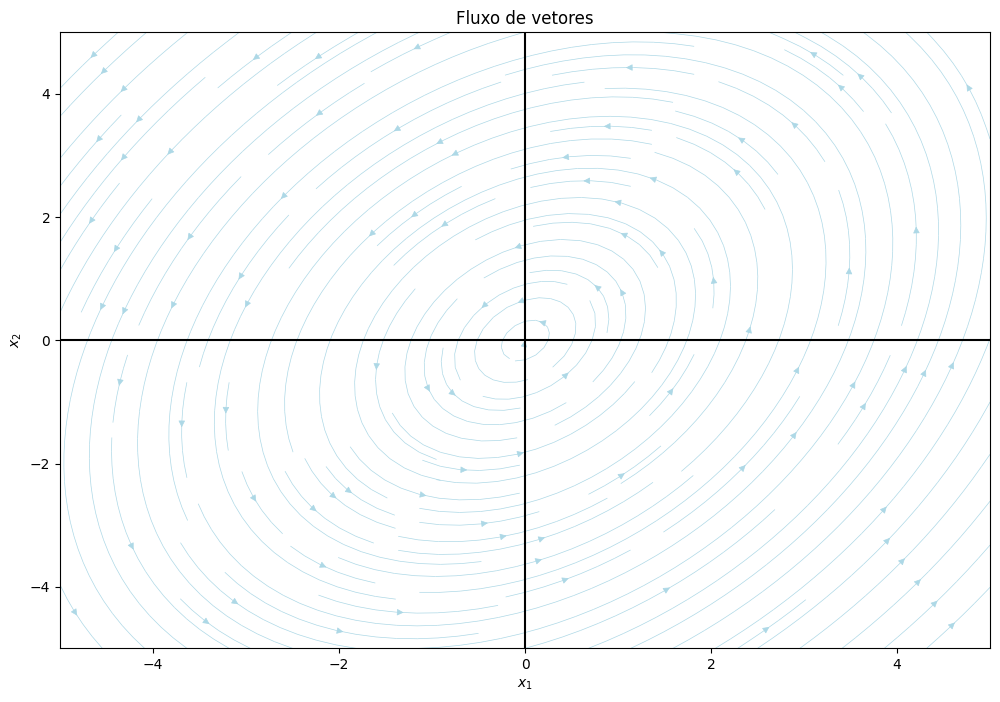

In [14]:
x_inic, x_final = -5, 5    # intervalo estudado no eixo x
y_inic, y_final = -5, 5    # intervalo estudado no eixo y

nx = 30    # número de pontos que queremos entre x_inic e x_final
ny = 30    # número de pontos que queremos entre y_inic e y_final

# coordenadas dos pontos a serem plotados
x_ponto = np.linspace(x_inic, x_final, nx)
y_ponto = np.linspace(y_inic, y_final, ny)

# definindo uma malha de pontos com essas coordenadas
x_malha, y_malha = np.meshgrid(x_ponto, y_ponto)

# a equação diferencial é da forma (u1, u2)' = f(u1, u2)
def f(x1, x2):
    return [(1/2)*x1 + (-5/4)*x2, (2)*x1 - (1/2)*x2]

x_vetor = np.zeros(x_malha.shape)   # coordenadas x de cada vetor inicializadas em 0
y_vetor = np.zeros(y_malha.shape)   # coordenadas y de cada vetor inicializadas em 0

for i in range(ny):
    for j in range(nx):
        x = x_malha[i, j]
        y = y_malha[i, j]
        vet = f(x, y)
        x_vetor[i, j] = vet[0]    # preenchendo as coordenadas dos vetores
        y_vetor[i, j] = vet[1]

# plotando as retas geradas pelos autovetores
xi = np.linspace(x_inic, x_final, 200)
# controlando o tamanho do gráfico plotado
plt.rcParams['figure.figsize'] = [12, 8]
# fluxo de vetores
plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue', density=1.5, linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.axhline(color='k')
plt.axvline(color='k')
plt.title('Fluxo de vetores')
plt.show()